Accuracy : 0.968609865470852

Matrice de confusion :
 [[965   0]
 [ 35 115]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



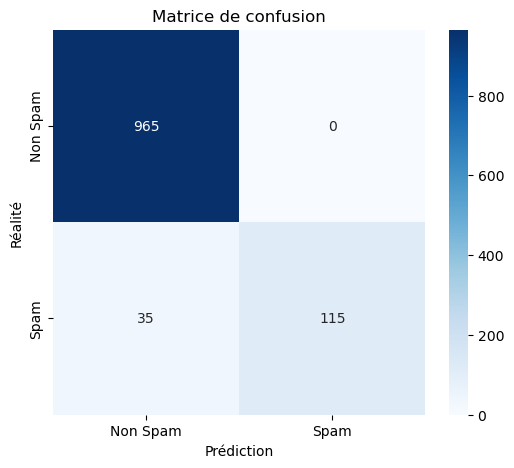

NameError: name 'ptl' is not defined

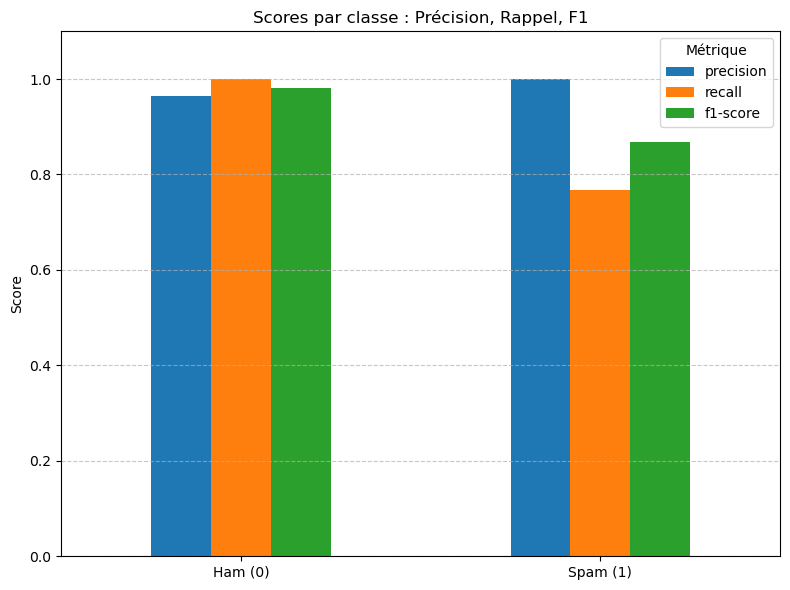

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Chargement des données
df = pd.read_csv('spam.csv', encoding='latin1')
df = df.rename(columns={'v1': 'Category', 'v2': 'Message'})
df = df[['Category', 'Message']]
df.dropna(inplace=True)
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

# 2. Vectorisation TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Message'])
y = df['Category']

# 3. Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entraînement du modèle Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# 5. Prédiction sur les données de test
y_pred = model.predict(X_test)

# 6. Évaluation du modèle
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nMatrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

# 7. Visualisation de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non Spam', 'Spam'], yticklabels=['Non Spam', 'Spam'])
plt.title("Matrice de confusion")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")

plt.savefig("Matrice_de_confusion.png")


plt.show()

# 8. Visualisation des scores de classification
# Préparer le rapport de classification en DataFrame
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Extraire uniquement les lignes correspondant aux classes 0 et 1
df_report_classes = df_report.loc[['0', '1']]

# Tracer le graphique
df_report_classes[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 6))
plt.title("Scores par classe : Précision, Rappel, F1")
plt.ylabel("Score")
plt.xticks([0, 1], ['Ham (0)', 'Spam (1)'], rotation=0)
plt.legend(title="Métrique")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

ptl.savefig("Score_de_classification")

plt.show()

# 9. Tester un message personnalisé
test_message = ["Congratulations! You have won a free iPhone. Click here to claim."]
test_vect = vectorizer.transform(test_message)
prediction = model.predict(test_vect)
print("\nMessage :", test_message[0])
print("Spam détecté ?" , "Oui (spam)" if prediction[0] == 1 else "Non (ham)")
